In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

seed=42


import os

import torch
import torch.nn as nn
import torch.nn.functional as F
if torch.cuda.is_available():
    print("Yeah we have a GPU!")
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

from gdeep.decision_boundary.decision_boundary_calculator import *
from gdeep.create_nets.sample_nn import SampleCNN_MNIST_SAMPLE,\
    SampleCNN_MNIST_SAMPLE_2
from gdeep.create_nets import Net

try:
    from color_scale import lab_color_scale
except:
    pass

In [3]:
# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

batch_size = 64

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))])

# Train set
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainset.targets[(trainset.targets != 0) & (trainset.targets != 1)] = 2

# Filters for labels 0 and 1
#trainset_0_1 = torch.utils.data.Subset(trainset, torch.stack((trainset.targets == 0, trainset.targets == 1), axis=-1).any(-1).nonzero()[:,0])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2,
                                          pin_memory=True)


# Test set
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testset.targets[(testset.targets != 0) & (testset.targets != 1)] = 2


# Filters for labels 0 and 1
#testset_0_1 = torch.utils.data.Subset(testset, torch.stack((testset.targets == 0, testset.targets == 1), axis=-1).any(-1).nonzero()[:,0])
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2,
                                         pin_memory=True)

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SampleCNN_MNIST_SAMPLE_multiclass(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [5]:
digit_detect_nn = SampleCNN_MNIST_SAMPLE_multiclass().to(dev)

print("Trainable parameters of NN:",\
    sum(p.numel() for p in digit_detect_nn.parameters()), '\n')

print(digit_detect_nn)

Trainable parameters of NN: 61111 

SampleCNN_MNIST_SAMPLE_multiclass(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=3, bias=True)
)


In [6]:
n_epoch = 6

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(digit_detect_nn.parameters(), lr=0.001, momentum=0.9)


for epoch in range(n_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(dev)
        labels = labels.to(dev)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = digit_detect_nn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

print('Finished Training')

[1,    20] loss: 1.074
[1,    40] loss: 0.989
[1,    60] loss: 0.901
[1,    80] loss: 0.790
[1,   100] loss: 0.697
[1,   120] loss: 0.650
[1,   140] loss: 0.646
[1,   160] loss: 0.607
[1,   180] loss: 0.617
[1,   200] loss: 0.613
[1,   220] loss: 0.574
[1,   240] loss: 0.545
[1,   260] loss: 0.549
[1,   280] loss: 0.559
[1,   300] loss: 0.556
[1,   320] loss: 0.545
[1,   340] loss: 0.523
[1,   360] loss: 0.465
[1,   380] loss: 0.470
[1,   400] loss: 0.410
[1,   420] loss: 0.379
[1,   440] loss: 0.318
[1,   460] loss: 0.294
[1,   480] loss: 0.242
[1,   500] loss: 0.201
[1,   520] loss: 0.163
[1,   540] loss: 0.159
[1,   560] loss: 0.143
[1,   580] loss: 0.130
[1,   600] loss: 0.119
[1,   620] loss: 0.114
[1,   640] loss: 0.107
[1,   660] loss: 0.139
[1,   680] loss: 0.115
[1,   700] loss: 0.102
[1,   720] loss: 0.094
[1,   740] loss: 0.082
[1,   760] loss: 0.090
[1,   780] loss: 0.086
[1,   800] loss: 0.069
[1,   820] loss: 0.098
[1,   840] loss: 0.066
[1,   860] loss: 0.065
[1,   880] 

In [7]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(dev)
        labels = labels.to(dev)
        outputs = digit_detect_nn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %f %%' % (
    100. * correct / total))

Accuracy of the network on the 10000 test images: 99.330000 %


In [8]:
for param in digit_detect_nn.parameters():
            param.requires_grad = False
model = lambda x: F.softmax(digit_detect_nn(x), dim=-1)


In [36]:
steps = 1


dc_samples = {'spacial': [], 'gradients': []}

for initial_points_batch, _ in iter(testloader):
    initial_points_batch.to(dev, non_blocking=True)
    g = GradientFlowDecisionBoundaryCalculator(
                model=model,
                initial_points=initial_points_batch,
                optimizer=lambda params: torch.optim.Adam(params)
    )
    #TODO: clip to [0,1]
    g.step(steps)

    y = g.get_decision_boundary()
    delta = torch.zeros_like(y, requires_grad=True)
    loss = torch.sum(torch.einsum('ij,j->i', model(y+delta), torch.tensor([1., 0.])))
    loss.backward()
    dc_samples['gradients'].append(delta.grad.detach())

    dc_samples['spacial'].append(y.detach().cpu())

RuntimeError: size of dimension does not match previous size, operand 1, dim 0

In [9]:
n_batch =1
steps = 1000
n_classes = 3
dc_samples = {'spacial': [], 'gradients': []}

for i in range(n_batch):
    initial_points_batch = torch.rand([64, 1, 28, 28])
    initial_points_batch.to(dev, non_blocking=True)
    g = GradientFlowDecisionBoundaryCalculator(
                model=model,
                initial_points=initial_points_batch,
                optimizer=lambda params: torch.optim.Adam(params)
    )
    #TODO: clip to [0,1]
    g.step(steps)
    y = g.get_decision_boundary()
   
    grads = []
    for j in range(n_classes):
        delta = torch.zeros_like(y, requires_grad=True)
        loss = model(y+delta)[:, j].sum()
        loss.backward()
        grads.append(delta.grad.detach())
        #del delta

    
    grads_tensor = torch.stack(grads, 0)
    top2_tensor = torch.topk(model(y), 2).indices
    top_tensor = torch.max(top2_tensor, dim = -1).values
    dc_samples['gradients'].append(grads_tensor[top_tensor])
    dc_samples['spacial'].append(y.detach().cpu())

In [46]:
grads_tensor[:,:,0,0,0][top_tensor]

tensor([[-0.0007,  0.0006, -0.0003,  ..., -0.0008,  0.0003,  0.0014],
        [-0.0007,  0.0006, -0.0003,  ..., -0.0008,  0.0003,  0.0014],
        [-0.0007,  0.0006, -0.0003,  ..., -0.0008,  0.0003,  0.0014],
        ...,
        [-0.0007,  0.0006, -0.0003,  ..., -0.0008,  0.0003,  0.0014],
        [-0.0007,  0.0006, -0.0003,  ..., -0.0008,  0.0003,  0.0014],
        [-0.0007,  0.0006, -0.0003,  ..., -0.0008,  0.0003,  0.0014]])

In [40]:
idx.shape

torch.Size([2, 64])

In [38]:
idx = torch.stack((top_tensor, torch.arange(top_tensor.shape[0])))

In [55]:
equal_components = True
for i in range(grads_tensor.shape[0]):
    for j in range(grads_tensor.shape[0]):
        if not (grads_tensor[top_tensor][i, : , :, : ,:] == grads_tensor[top_tensor][j, :, :, : ,:]).all():
            equal_components = False
print(equal_components)

True


In [82]:
dc_samples_tensor = {'spacial': [], 'gradients': []}
dc_samples_tensor['spacial'] = torch.cat(dc_samples['spacial'], axis=0)
dc_samples_tensor['gradients'] = torch.cat(dc_samples['gradients'], axis=0).reshape([-1, 28*28])
dc_samples_tensor['normal'] = dc_samples_tensor['gradients'] / dc_samples_tensor['gradients'].norm(dim=1)[:, None]

In [ ]:
db_file = os.path.join('tensors', 'db_normal')
try:
    torch.save(dc_samples_tensor, db_file)
except:
    pass
dc_samples_tensor_loaded = torch.load(db_file)

In [78]:
dc_samples_tensor['normal'].shape

torch.Size([4096, 784])

In [37]:
spacial_samples = dc_samples_tensor['spacial'].numpy()[:,0,:,:]
batch_size, pixel_x, pixel_y = spacial_samples.shape
spacial_samples = spacial_samples.reshape([batch_size, pixel_x * pixel_y])

In [53]:
from gtda.homology import VietorisRipsPersistence
VR = VietorisRipsPersistence(homology_dimensions=[0,1,2], 
                                     reduced_homology=True, max_edge_length = 50,
                                     collapse_edges = True)
from scipy.spatial import distance_matrix

In [38]:
data = spacial_samples[:,:]
data = data[None,:,:]


In [56]:
distance_matrix(X_pca, X_pca).shape

(4096, 4096)

In [57]:

PD = VR.fit_transform(distance_matrix(X_pca, X_pca))
from gtda.plotting import plot_diagram
plot_diagram(PD[0])

ValueError: Input must be a single 3D array or a list of 2D arrays or sparse matrices. Structure of dimension 2 passed.
Reshape your input X using X.reshape(1, *X.shape) or X[None, :, :] if X is a single point cloud/distance matrix/adjacency matrix of a weighted graph.

In [83]:
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd
n_comp = 3
pca = PCA(n_components=n_comp)
X_pca = pca.fit_transform(dc_samples_tensor['normal'])
df = pd.DataFrame(X_pca, columns = ["x"+str(i) for i in range(len(X_pca[0]))])
fig = px.scatter(df,x="x0",y="x1")
fig.show()

In [61]:
dc_samples_tensor['normal']

tensor([[ 3.7920e-04, -1.4657e-04,  1.4701e-03,  ..., -1.3576e-03,
          1.9594e-03,  2.0799e-03],
        [ 1.1617e-03,  1.3816e-03,  2.2064e-03,  ...,  1.1665e-03,
         -2.1552e-03, -1.8169e-03],
        [-4.0897e-04,  4.5657e-04, -1.2048e-03,  ..., -1.2701e-03,
          1.8314e-03,  1.8642e-03],
        ...,
        [-1.2707e-03,  1.0555e-03, -9.7335e-06,  ..., -9.3095e-04,
          1.7010e-03,  7.3919e-04],
        [-1.4850e-03, -3.4374e-03, -4.8352e-03,  ..., -1.1593e-03,
         -1.8069e-03,  6.1351e-04],
        [ 1.7124e-04,  1.0557e-03,  9.8254e-04,  ..., -1.9104e-03,
         -2.0501e-04,  4.3022e-04]])

In [45]:
X_pca.shape

(4096, 3)

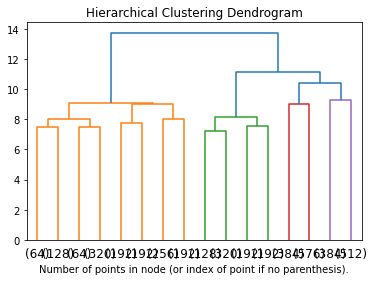

In [81]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)


model = model.fit(dc_samples_tensor['normal'])
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [52]:
from umap import UMAP
import pandas as pd

In [46]:
embedding = UMAP(n_components=3)
X_transformed = embedding.fit_transform(dc_samples_tensor['normal'])
df = pd.DataFrame(X_transformed, columns = ["x"+str(i) for i in range(len(X_transformed[0]))])


fig = px.scatter_3d(df,x="x0",y="x1",z="x2")
fig.show()

NameError: name 'UMAP' is not defined

In [ ]:
enumerate(trainloader)

In [ ]:
for initial_points_batch, _ in iter(testloader):
    print(initial_points_batch.size())

In [27]:
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)


In [47]:
import plotly.express as px
res = torch.mm(dc_samples_tensor['normal'], dc_samples_tensor['normal'].transpose(0,1))
px.histogram(res.reshape(-1))

KeyboardInterrupt: 

In [60]:
n_comp = 3
pca = PCA(n_components=n_comp)
X_pca = pca.fit_transform(dc_samples_tensor['normal'])
df = pd.DataFrame(X_pca, columns = ["x"+str(i) for i in range(len(X_pca[0]))])
fig = px.scatter_3d(df,x="x0",y="x1",z="x2")
fig.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [40]:
dc_samples_tensor['gradients']

tensor([[ 4.1752e-11,  1.4599e-10,  7.8330e-11,  ...,  1.6540e-12,
          2.7935e-12, -2.7416e-11],
        [ 5.8763e-11,  5.9118e-11,  1.6165e-11,  ...,  1.9614e-11,
          4.0424e-11,  2.6884e-12],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])